<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/ModelBuilding_WithoutClinicalFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FinalMergedDS.csv to FinalMergedDS.csv


In [4]:
fmds_actual = pd.read_csv('FinalMergedDS.csv')
fmds_copy = fmds_actual.copy()
print("Shape of FMDS before removing duplicates: ",fmds_copy.shape)
actual_rows = fmds_copy.shape[0]
fmds_copy = fmds_copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',fmds_copy.shape)
rows_after_deleting_duplicates = fmds_copy.shape[0]
print('No.of Duplicate rows in the Ishan Dutta''s Dataset = ', (actual_rows - rows_after_deleting_duplicates))

Shape of FMDS before removing duplicates:  (267882, 5)
Shape of dataset after removing the duplicates:  (25802, 5)
No.of Duplicate rows in the Ishan Duttas Dataset =  242080


In [5]:
print(fmds_copy.head())
print('')
print('===Information of FMDS===')
print(fmds_copy.info())
print('')
print('===Description of FMDS===')
print(fmds_copy.describe())

   Age   BMI  HighChol  HighBP  Diabetes
0    9  40.0         1       1         0
1    7  25.0         0       0         0
2    9  28.0         1       1         0
3   11  27.0         0       1         0
4   11  24.0         1       1         0

===Information of FMDS===
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25802 entries, 0 to 267878
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       25802 non-null  int64  
 1   BMI       25802 non-null  float64
 2   HighChol  25802 non-null  int64  
 3   HighBP    25802 non-null  int64  
 4   Diabetes  25802 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 MB
None

===Description of FMDS===
                Age           BMI      HighChol        HighBP      Diabetes
count  25802.000000  25802.000000  25802.000000  25802.000000  25802.000000
mean       6.605806     28.373999      0.218123      0.187001      0.165181
std        3.836438      6.162468  

In [6]:
print('===No.of Unique Values===')
print(fmds_copy.nunique())
print('')
print('===Check for any NAN values===')
print(fmds_copy.isnull().sum())

===No.of Unique Values===
Age           14
BMI         2708
HighChol       2
HighBP         2
Diabetes       2
dtype: int64

===Check for any NAN values===
Age         0
BMI         0
HighChol    0
HighBP      0
Diabetes    0
dtype: int64


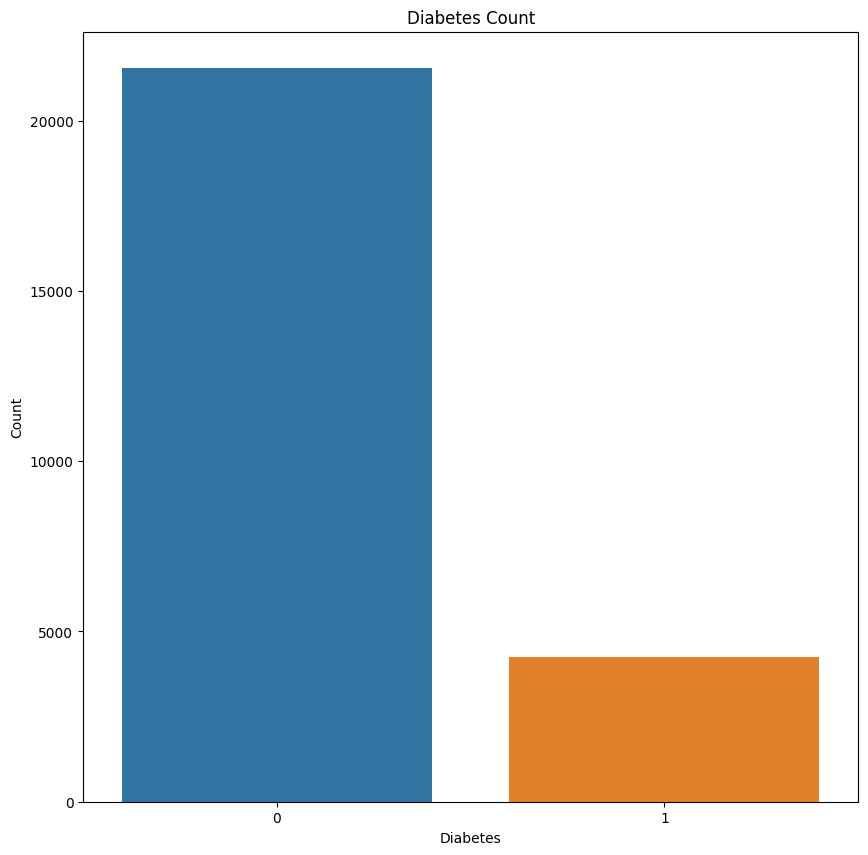

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(data=fmds_copy, x='Diabetes')
plt.title('Diabetes Count')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [24]:
# Splitting data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(fmds_copy.drop('Diabetes', axis=1), fmds_copy['Diabetes'], test_size=0.25, random_state=42)

In [25]:
# Creating ANN with different solvers and with max_iterations
print('ANN model in predicting diabetes for clinical features\n')
for max_iterations in range(1000,2200,200):
  for solvers in ['lbfgs','sgd','adam']:
    model_sgd = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver=solvers, max_iter= max_iterations)
    # Training model_sgd
    model_sgd.fit(X_train, y_train)
    # Evaluate model_sgd on test set
    accuracy = model_sgd.score(X_test, y_test)
    accuracy = round(accuracy*100,2)
    print('Accuracy when', solvers, 'solver is used:', accuracy,'% when max_iter = ',max_iterations)
    # Make predictions on new data
    new_data = pd.DataFrame({'Age': [10], 'BMI': [34], 'HighChol': [1], 'HighBP': [1]})
    predictions_sgg_model_sgd = model_sgd.predict(new_data)
    if predictions_sgg_model_sgd == 1:
      print('You have diabetes')
      print('')
    else:
      print('You are free from diabtes')
      print('')

ANN model in predicting diabetes for clinical features

Accuracy when lbfgs solver is used: 86.5 % when max_iter =  1000
You are free from diabtes

Accuracy when sgd solver is used: 86.53 % when max_iter =  1000
You are free from diabtes

Accuracy when adam solver is used: 87.24 % when max_iter =  1000
You are free from diabtes

Accuracy when lbfgs solver is used: 86.53 % when max_iter =  1200
You are free from diabtes

Accuracy when sgd solver is used: 86.67 % when max_iter =  1200
You are free from diabtes

Accuracy when adam solver is used: 87.35 % when max_iter =  1200
You are free from diabtes

Accuracy when lbfgs solver is used: 86.59 % when max_iter =  1400
You are free from diabtes

Accuracy when sgd solver is used: 86.68 % when max_iter =  1400
You are free from diabtes

Accuracy when adam solver is used: 87.23 % when max_iter =  1400
You are free from diabtes

Accuracy when lbfgs solver is used: 86.45 % when max_iter =  1600
You are free from diabtes

Accuracy when sgd solver